# Kepler Exoplanet Classification  
## Notebook 01 — Dataset Overview & Cleaning

This notebook performs the initial loading, inspection, and cleaning of the NASA Cumulative Kepler KOI dataset.  
Objectives:

- Load the raw dataset  
- Inspect rows, columns, datatypes  
- Identify missing values  
- Drop irrelevant or text-only columns  
- Handle missing values (median imputation)  
- Produce a cleaned dataframe to use in later notebooks  


## Read the data

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Matplotlib darkmode
plt.style.use('dark_background')

In [27]:
df = pd.read_csv(
    "../data/cumulative_2025.11.22_15.28.10.csv",
    comment="#",
    low_memory=False
)

In [28]:
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,-1.757,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072
9560,9561,10128825,K07986.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.497,0,...,-0.250,0.490,0.780,0.460,0.500,0.400,-0.180,0.470,0.530,0.470
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.021,0,...,-3.650,0.260,5.000,0.220,3.380,0.160,-3.890,0.260,5.160,0.220
9562,9563,10155286,K07988.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.092,0,...,1.320,0.670,1.690,0.530,1.450,0.110,1.370,0.660,2.000,0.460


## Data Overview

In [29]:
df.shape

(9564, 141)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 141 entries, rowid to koi_dikco_msky_err
dtypes: float64(117), int64(7), object(17)
memory usage: 10.3+ MB


In [31]:
# Keep relevent columns only
keep_cols = [
    "koi_disposition", "koi_pdisposition", "koi_score", "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec",
    "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth",
    "koi_prad", "koi_teq", "koi_insol", "koi_model_snr",
    "koi_steff", "koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"
]

df = df[keep_cols]


In [32]:
df

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,...,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.146,...,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.586,...,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.969,...,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,...,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.701,...,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,131.705093,1.252,...,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082
9560,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,133.001270,0.043,...,0.72,1608.0,1585.81,10.6,6119.0,4.444,1.031,286.50937,47.163219,14.757
9561,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,132.181750,0.147,...,1.07,2218.0,5713.41,12.3,6173.0,4.447,1.041,294.16489,47.176281,15.385
9562,CANDIDATE,CANDIDATE,0.092,0,0,0,0,333.486169,153.615010,0.214,...,19.30,557.0,22.68,14.0,4989.0,2.992,7.824,296.76288,47.145142,10.998


In [33]:
df.isnull().sum()

koi_disposition        0
koi_pdisposition       0
koi_score           1510
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_time0bk            0
koi_impact           363
koi_duration           0
koi_depth            363
koi_prad             363
koi_teq              363
koi_insol            321
koi_model_snr        363
koi_steff            363
koi_slogg            363
koi_srad             363
ra                     0
dec                    0
koi_kepmag             1
dtype: int64

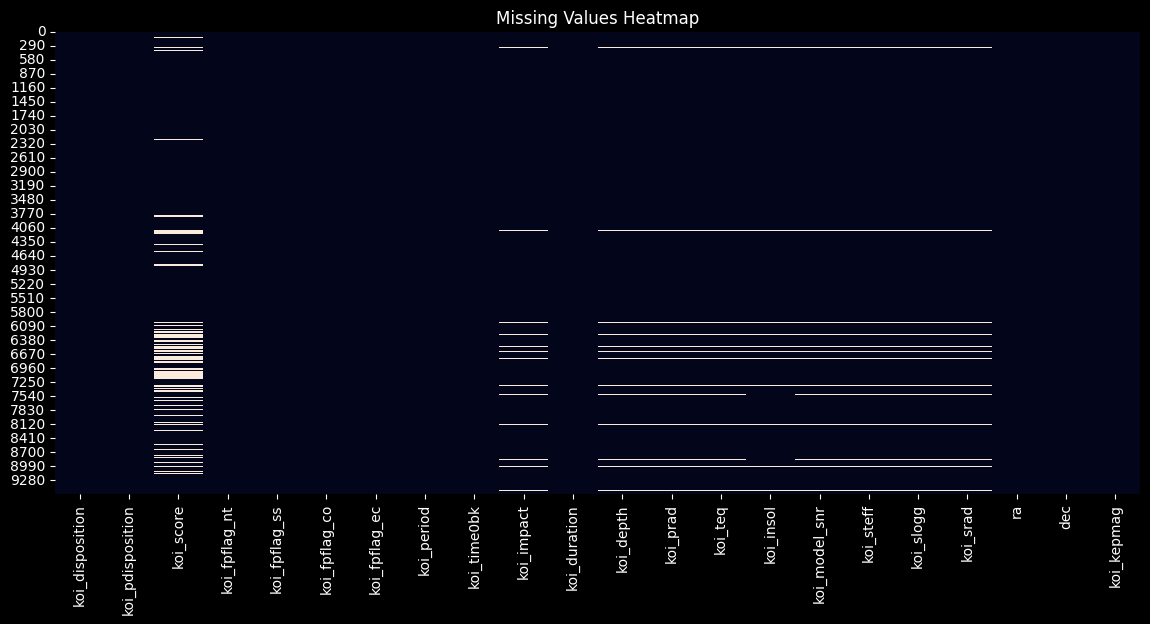

In [34]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [35]:
critical_cols = [
    "koi_impact", "koi_depth", "koi_prad", "koi_teq", "koi_insol",
    "koi_model_snr", "koi_steff", "koi_slogg", "koi_srad", "koi_kepmag"
]

df = df.dropna(subset=critical_cols)

**364 observations** were missing values and thus have been eliminated.

Now, only variable `koi_score` presents a big amount of missing values. (Roughly 15%).

We would like to handle it through 2 different methods:
- Records elimination
- Missing replacement by conditionated mean among the koi_disposition classes.

In [36]:
df[df['koi_score'].isna()]['koi_disposition'].value_counts()

koi_disposition
FALSE POSITIVE    687
CANDIDATE         503
CONFIRMED          16
Name: count, dtype: int64

In [37]:
df[df['koi_score'].isna()]['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    688
CANDIDATE         518
Name: count, dtype: int64

`koi_pdisposition` categorizes each object only as either *false positive* or *candidate*, based solely on the internal Kepler pipeline results.
In contrast, `koi_disposition` represents the official classification used by the NASA Exoplanet Archive. This variable is the authoritative source to determine whether a KOI is truly a confirmed exoplanet.

For this reason, `koi_disposition` is the variable we rely on to define the final ground-truth labels.

Regarding `koi_score`, we remove all observations with missing values (1,206 records).
The `koi_score` metric takes a value between 0 and 1 and reflects the confidence level associated with the object's disposition. Because this score represents expert-assessed vetting certainty, we cannot reliably estimate or impute it—especially since we are not domain specialists.

Furthermore, the majority of missing `koi_score` values correspond to objects that are **not confirmed exoplanets**, making imputation even less appropriate.

Thus, dropping rows with missing `koi_score` provides a cleaner and more reliable dataset for model training.


In [38]:
df = df.dropna(subset=['koi_score'])

In [39]:
df.isnull().sum()

koi_disposition     0
koi_pdisposition    0
koi_score           0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_period          0
koi_time0bk         0
koi_impact          0
koi_duration        0
koi_depth           0
koi_prad            0
koi_teq             0
koi_insol           0
koi_model_snr       0
koi_steff           0
koi_slogg           0
koi_srad            0
ra                  0
dec                 0
koi_kepmag          0
dtype: int64

In [40]:
df = df.copy()
df.loc[:,"target"] = df['koi_disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)

In [41]:
# drop koi_disposition and koi_pdisposition
df = df.drop(columns=["koi_disposition", "koi_pdisposition"])

While exploring the data in the next data, I have found that there was an irregular data in the column koi_fpflag_nt. I should now remove it.

In [42]:
df[df['koi_fpflag_nt'] == 465]

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,target
3008,1.0,465,0,0,0,16.542953,169.65031,0.329,3.8516,726.0,...,611.0,32.94,36.1,5215.0,4.518,0.867,297.67261,48.302311,14.687,1


In [43]:
df = df[df['koi_fpflag_nt'].isin([0,1])]

In [44]:
df.to_csv("../data/data_preprocessed.csv", index=False)